In [151]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import json
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Experimenting with Gaussian Copulas

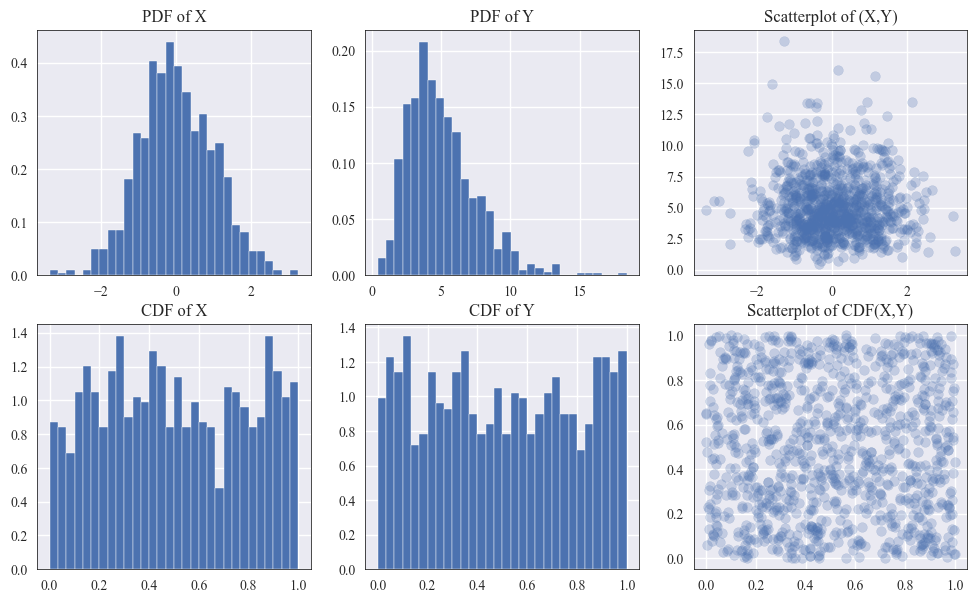

In [152]:
normal = stats.norm()
gamma = stats.gamma(a=5)

X = normal.rvs(1000)
Y = gamma.rvs(1000)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

ax[0][0].hist(X, density = True, bins = 30)
ax[0][0].set(title = 'PDF of X')

ax[0][1].hist(Y, density = True, bins = 30)
ax[0][1].set(title = 'PDF of Y')

ax[0][2].scatter(X, Y, alpha = 0.25)
ax[0][2].set(title = 'Scatterplot of (X,Y)')

ax[1][0].hist(normal.cdf(X), density = True, bins = 30)
ax[1][0].set(title = 'CDF of X')

ax[1][1].hist(gamma.cdf(Y), density = True, bins = 30)
ax[1][1].set(title = 'CDF of Y')

ax[1][2].scatter(normal.cdf(X), gamma.cdf(Y), alpha = 0.25)
ax[1][2].set(title = 'Scatterplot of CDF(X,Y)');

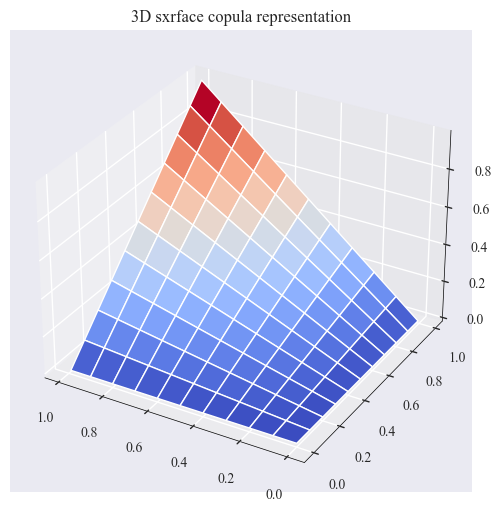

In [156]:
import numpy as np

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection='3d')

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
x,y = np.meshgrid(x,y)

# apply inverse CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(normal.ppf(x).flatten(),gamma.ppf(y).flatten())])
# calculate the product of two CDFs for each point on a grid
z = normal.cdf(pairs[:,0]).reshape([100,100]) * gamma.cdf(pairs[:,1]).reshape([100,100])

ax0.plot_surface(x, y, z, cmap='coolwarm', rstride=10, cstride=10, linewidth=1)
ax0.invert_xaxis()
ax0.set(title='3D sxrface copula representation');

In [160]:
y

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.97, 0.97, 0.97, ..., 0.97, 0.97, 0.97],
       [0.98, 0.98, 0.98, ..., 0.98, 0.98, 0.98],
       [0.99, 0.99, 0.99, ..., 0.99, 0.99, 0.99]])

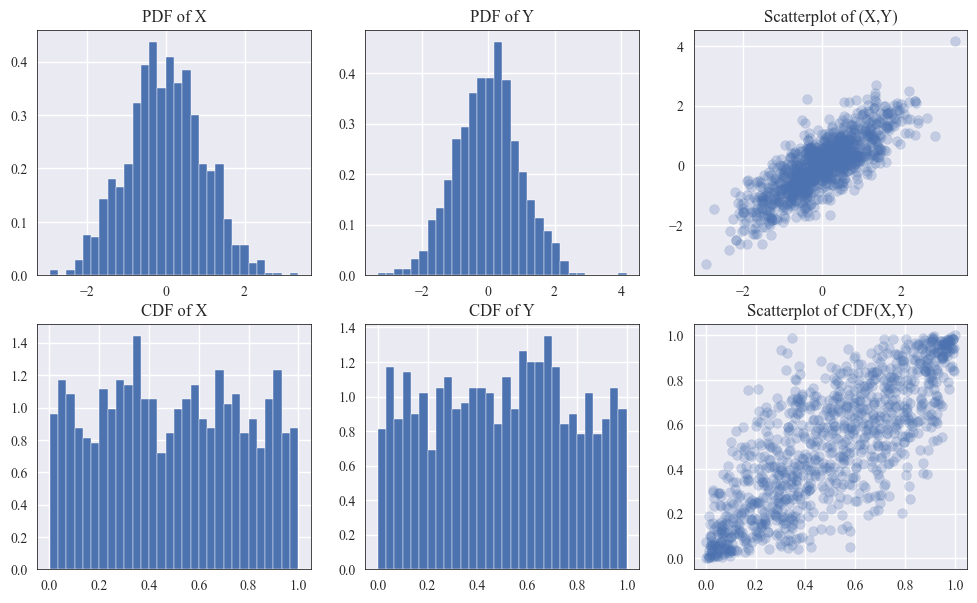

In [154]:
mu = np.array([0, 0])
rho = 0.8
cov = np.array([[1, rho], [rho, 1]])
multivariate_normal = stats.multivariate_normal(mean=mu, cov=cov)

multivariate_sample = multivariate_normal.rvs(size=1000)
X = multivariate_sample[:, 0]
Y = multivariate_sample[:, 1]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

ax[0][0].hist(X, density = True, bins = 30)
ax[0][0].set(title = 'PDF of X')

ax[0][1].hist(Y, density = True, bins = 30)
ax[0][1].set(title = 'PDF of Y')

ax[0][2].scatter(X, Y, alpha = 0.25)
ax[0][2].set(title = 'Scatterplot of (X,Y)')

ax[1][0].hist(normal.cdf(X), density = True, bins = 30)
ax[1][0].set(title = 'CDF of X')

ax[1][1].hist(normal.cdf(Y), density = True, bins = 30)
ax[1][1].set(title = 'CDF of Y')

ax[1][2].scatter(normal.cdf(X), normal.cdf(Y), alpha = 0.25)
ax[1][2].set(title = 'Scatterplot of CDF(X,Y)');

In [162]:
copula.vector.quantile(x[0])

,ADANIENT.NS,CIPLA.NS
0.00,0.000289,0.000289
0.01,0.010655,0.010286
0.02,0.020491,0.020364
0.03,0.030280,0.030280
0.04,0.040277,0.040404
...,...,...
0.95,0.950014,0.950014
0.96,0.960012,0.960012
0.97,0.970009,0.970274
0.98,0.980087,0.980214


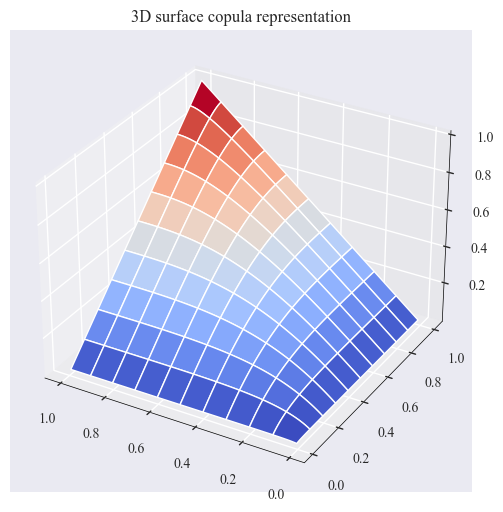

In [164]:
# create a grid
x = np.arange(0.01,1.01,0.01)
y = np.arange(0.01,1.01,0.01)
x,y = np.meshgrid(x,y)

# apply inverse standard normal CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(stats.norm.ppf(x).flatten(),stats.norm.ppf(y).flatten())])
# calculate the value of bivariate normal CDF for each point on a grid
z = multivariate_normal.cdf(pairs).reshape([100,100])

fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(111, projection='3d')

ax0.plot_surface(x, y, z, cmap='coolwarm', rstride=10, cstride=10, linewidth=1)
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation');

In [165]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
from copulapairtrading.copula import ClaytonCopula

copula = ClaytonCopula()

data = pd.read_csv('../data/price_data.csv', index_col = 0)

from statsmodels.tsa.stattools import coint
from itertools import combinations
from itertools import compress
from tqdm import tqdm
import numpy as np
def find_pairs(data, method = 'coint'):

    if method == 'coint':

        pvalues = []
        pairs = list(combinations(data.columns, 2))

        for x,y in tqdm(pairs, desc = "Finding Pairs..."):
            result = coint(data[y], data[x], autolag = 'bic')
            # print(result)
            pvalues.append(result[1])


        pvalues = np.where(np.array(pvalues) < 0.05, True, False)

        return list(compress(pairs, pvalues))

# pairs = find_pairs(data)
# data = data.pct_change().dropna() * 100


In [167]:
# import json
#
# with open('../data/pairs.json', 'w') as file:
#     json.dump(pairs, file, indent = 4)

In [297]:
with open('../data/pairs.json', 'r') as file:
    pairs = json.load(file)

TypeError: _lambdifygenerated() missing 27 required positional arguments: 'vector_2', 'vector_3', 'vector_4', 'vector_5', 'vector_6', 'vector_7', 'vector_8', 'vector_9', 'vector_10', 'vector_11', 'vector_12', 'vector_13', 'vector_14', 'vector_15', 'vector_16', 'vector_17', 'vector_18', 'vector_19', 'vector_20', 'vector_21', 'vector_22', 'vector_23', 'vector_24', 'vector_25', 'vector_26', 'vector_27', and 'vector_28'

1.801830336116682


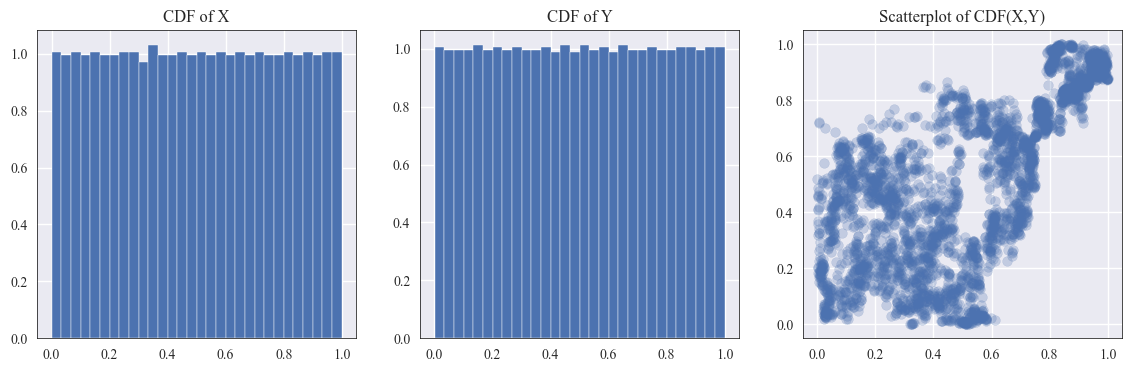

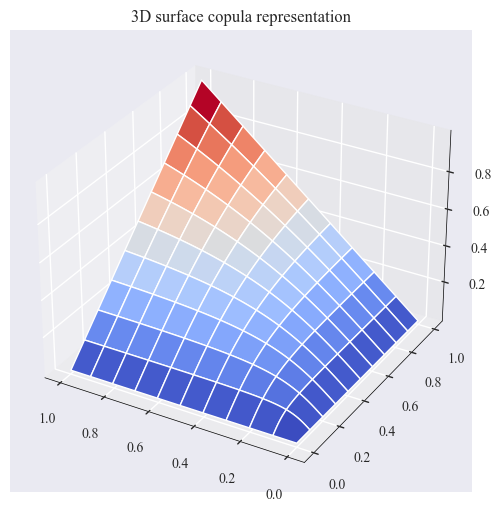

In [302]:
copula = ClaytonCopula()
copula.fit(vector = data[pairs[0]])
pdf = copula.pdf(alpha = 1, vector = data[pairs[0]])
marginal_u = copula.marginal_cdf(mask = [True, False], vector = data[pairs[0]])
marginal_v = copula.marginal_cdf(mask = [False, True], vector = data[pairs[0]])
marginal_u.index = pd.to_datetime(marginal_u.index)
marginal_v.index = pd.to_datetime(marginal_v.index)
print(copula.alpha)
copula.plot_2d()
copula.plot_3d()

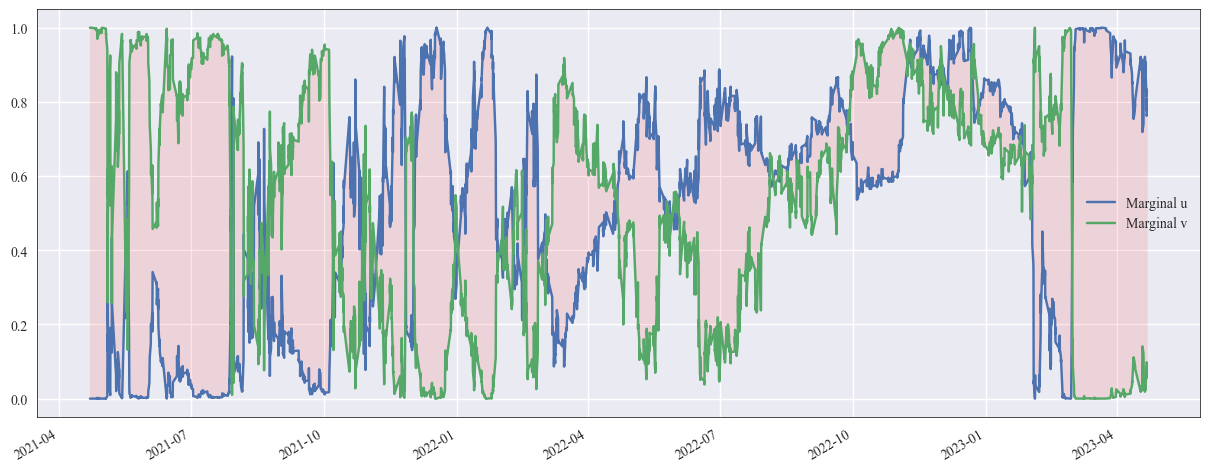

In [307]:
fig, ax = plt.subplots(nrows = 1, figsize = (15, 6))

marginal_u.plot(ax=ax, label = 'Marginal u')
marginal_v.plot(ax=ax, label = 'Marginal v')

ax.fill_between(marginal_u.index, marginal_u, marginal_v, alpha = 0.1, color = 'red');

ax.legend()

In [271]:
copula.alpha

1.801830336116682

(10000,)


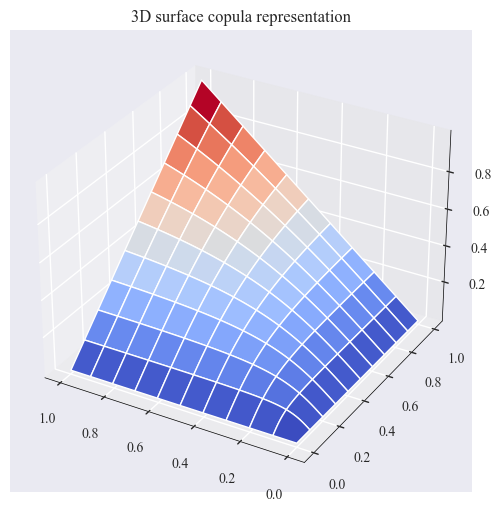

In [216]:
copula.vector.shape

(3465, 2)

(3465,)


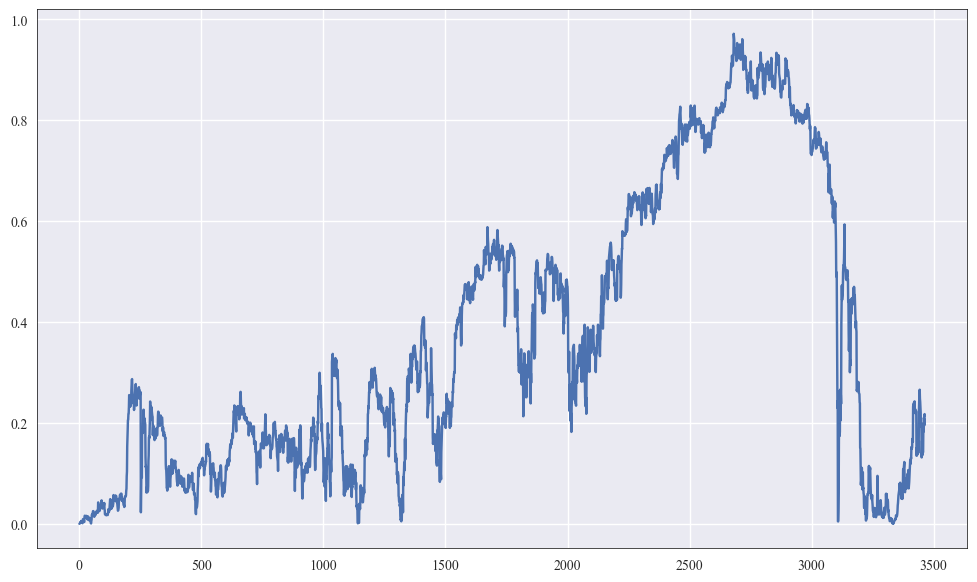

In [260]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 7))
ax.plot(copula.cdf(vector = copula.vector.values, alpha = copula.alpha))

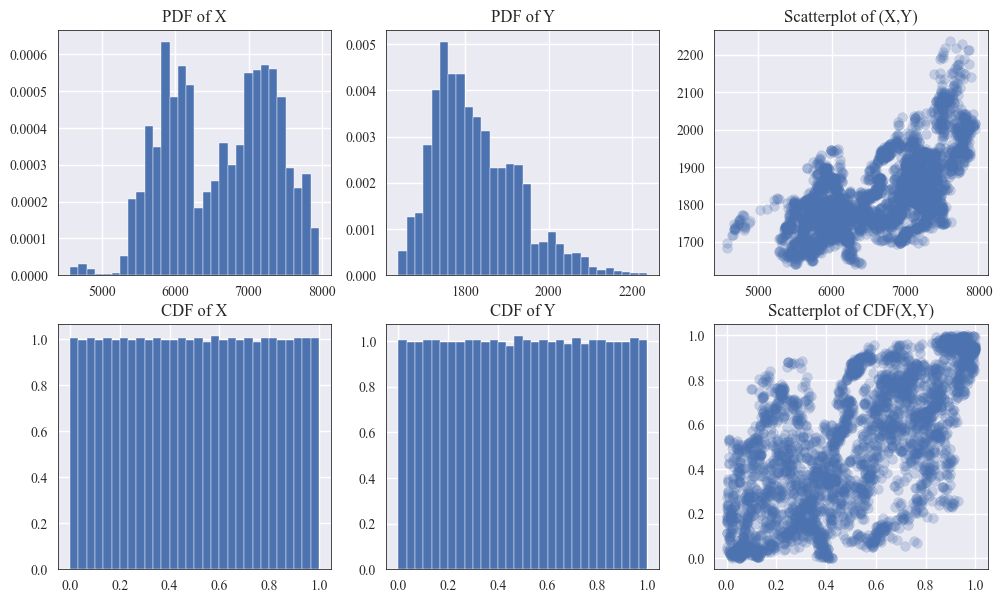

In [109]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))
ordinal_data = copula.convert_to_ecdf(vector = data)

i = 3
X = data[pairs[i][0]]
Y = data[pairs[i][1]]

ax[0][0].hist(X, density = True, bins = 30)
ax[0][0].set(title = 'PDF of X')

ax[0][1].hist(Y, density = True, bins = 30)
ax[0][1].set(title = 'PDF of Y')

ax[0][2].scatter(X, Y, alpha = 0.25)
ax[0][2].set(title = 'Scatterplot of (X,Y)')

ax[1][0].hist(ordinal_data[pairs[i][0]], density = True, bins = 30)
ax[1][0].set(title = 'CDF of X')

ax[1][1].hist(ordinal_data[pairs[i][1]], density = True, bins = 30)
ax[1][1].set(title = 'CDF of Y')

ax[1][2].scatter(ordinal_data[pairs[i][0]], ordinal_data[pairs[i][1]], alpha = 0.25)
ax[1][2].set(title = 'Scatterplot of CDF(X,Y)');

2021-04-22 09:15:00+05:30    4570.200195
2021-04-22 10:15:00+05:30    4575.950195
2021-04-22 11:15:00+05:30    4652.649902
2021-04-22 12:15:00+05:30    4648.000000
2021-04-22 13:15:00+05:30    4682.649902
                                ...     
2023-04-21 11:15:00+05:30    5885.899902
2023-04-21 12:15:00+05:30    5850.000000
2023-04-21 13:15:00+05:30    5912.750000
2023-04-21 14:15:00+05:30    5938.649902
2023-04-21 15:15:00+05:30    5937.899902
Name: BAJFINANCE.NS, Length: 3465, dtype: float64

<Axes: >

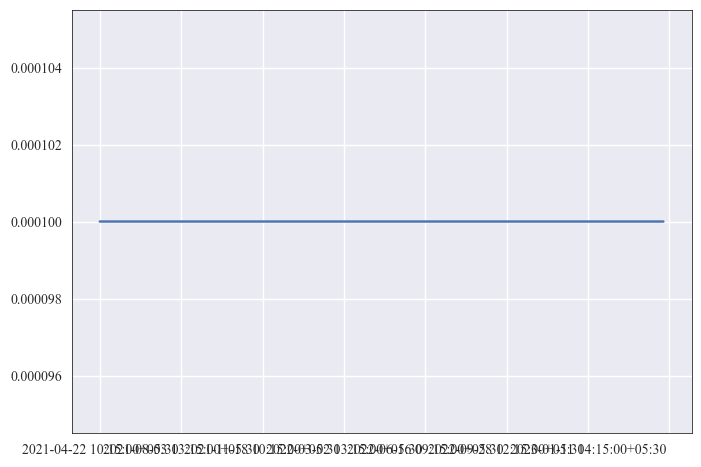

In [84]:
ordinal_data['CIPLA.NS'].plot()

In [87]:
print(copula.convert_to_ecdf(data[['CIPLA.NS']]))

                           CIPLA.NS
2021-04-22 10:15:00+05:30  0.120381
2021-04-22 11:15:00+05:30  0.163684
2021-04-22 12:15:00+05:30  0.549942
2021-04-22 13:15:00+05:30  0.395208
2021-04-22 14:15:00+05:30  0.069284
...                             ...
2023-04-21 11:15:00+05:30  0.890878
2023-04-21 12:15:00+05:30  0.444573
2023-04-21 13:15:00+05:30  0.267610
2023-04-21 14:15:00+05:30  0.853060
2023-04-21 15:15:00+05:30  0.422921

[3464 rows x 1 columns]
